**Data Analysis W1_3.** by Omonmurod

Statistik tahlil (Bivariate analysis)

Mavzular: Mean, Covariance, Correlation, similarity angle cos(theta), normalization, scaling

Datasetni yuklab olish:

In [61]:
#Calling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#California housing datasetni yuklash
cal_h = datasets.fetch_california_housing(as_frame=True)
df = cal_h.frame  # features + target DataFrame
# Ixtiyoriy 10 ta qatorni ko‘rish
df.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
15611,6.2578,9.0,7.325967,1.085635,1355.0,3.743094,32.67,-116.89,2.93100
8272,2.9384,38.0,4.301862,1.022606,1284.0,1.707447,33.77,-118.16,3.04100
4236,8.0073,39.0,7.266791,1.046642,1271.0,2.371269,34.12,-118.31,5.00001
9403,6.8742,25.0,5.900480,1.038369,1913.0,2.293765,37.88,-122.53,4.13100
4213,2.7685,29.0,3.658252,1.175728,2320.0,2.252427,34.14,-118.27,2.04500
11674,3.4167,36.0,5.196347,1.041096,725.0,3.310502,33.86,-117.99,1.87200
10463,5.4900,15.0,6.136401,1.047658,3033.0,2.492194,33.45,-117.65,2.39300
2850,3.6734,34.0,5.815341,0.985795,888.0,2.522727,35.38,-118.96,0.92900
9516,2.6310,29.0,5.148024,1.027754,3595.0,3.023549,39.16,-123.22,1.09600
6053,3.4464,36.0,5.015660,1.002237,2052.0,4.590604,34.04,-117.76,1.13000


In [62]:
#MedInc
mdi_list = df['MedInc'].values.tolist()
mdi_array = df['MedInc'].values
mdi_frame = df['MedInc']

#MedHouseVal
mhv_list = df['MedHouseVal'].values.tolist()
mhv_array = df['MedHouseVal'].values
mhv_frame = df['MedHouseVal']

In [63]:
def calculate_covariance(mdi_list, mhv_list):
    if len(mdi_list) != len(mhv_list):
        raise ValueError("Lists X1 and X2 must have the same length")

    n = len(mdi_list)
    mean_mdi = sum(mdi_list) / n
    mean_mhv = sum(mhv_list) / n

    covariance = sum((mdi_list[i] - mean_mdi) * (mhv_list[i] - mean_mhv) for i in range(n)) / n

    return covariance

calculate_covariance(mdi_list, mhv_list)

1.5084017429058632

In [64]:
def calculate_correlation(X1, X2):
    if len(X1) != len(X2):
       raise ValueError("Lists X1 and X2 must have the same length")

    n = len(X1)
    mean_X1 = sum(X1) / n
    mean_X2 = sum(X2) / n

    #Calculation covarience
    cov = sum((X1[i] - mean_X1) * (X2[i] - mean_X2) for i in range(n)) / n

    #Calculation STD
    std_X1 = (sum((xi - mean_X1) ** 2 for xi in X1) / n) ** 0.5
    std_X2 = (sum((xi - mean_X2) ** 2 for xi in X2) / n) ** 0.5

    #Calculate the correlation coeffitcient
    if std_X1 == 0 or std_X2 == 0:
        raise ValueError("STD can not be zero for correlation calculation")
    correlation = cov / (std_X1 * std_X2)

    return correlation
calculate_correlation(mdi_list, mhv_list)

0.6880752079585366

In [65]:
#dataframe
df[['MedInc', 'MedHouseVal']].corr()

,MedInc,MedHouseVal
MedInc,1.000000,0.688075
MedHouseVal,0.688075,1.000000


PDF values for the medium income length data: 
[0.01343988 0.01383943 0.04286798 ... 0.10932538 0.12042306 0.15489856]


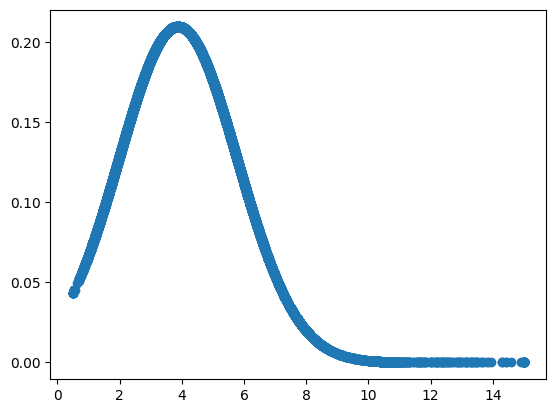

In [66]:
def calculate_pdf_vectorized(data):
    mu = np.mean(data)     #The mean caculation
    sigma = np.std(data, ddof=1)    #STD calculation
    coeff = 1 / (sigma * np.sqrt(2 * np.pi))   #Precompute the coefficient

    #Compute the exponent part for all data points in one go
    exponent = np.exp(-((data - mu) ** 2) / (2 * sigma ** 2))

    return coeff * exponent

#Calculate the PDF for all data points in the MedInc array
pdf_values = calculate_pdf_vectorized(mdi_array)

print("PDF values for the medium income length data: ")
print(pdf_values)
plt.scatter(mdi_array, pdf_values)

In [67]:
def min_max(array):
    min_value = np.min(array)
    max_value = np.max(array)
    return (array - min_value) / (max_value - min_value)

min_max(mdi_array)

array([0.53966842, 0.53802706, 0.46602805, ..., 0.08276438, 0.09429525,
       0.13025338])